<a href="https://colab.research.google.com/github/Sunnu48/Crypto_portfolio_prediciton/blob/main/Algorithmic%20trading%20strategy%20moving%20average.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#data Extraction

In [3]:
from pandas_datareader import data as web

In [4]:
import datetime as datetime

In [5]:
start=datetime.datetime(2015,1,2)

In [6]:
end=datetime.datetime(2020,12,31)

In [7]:
#!pip install yfinance
import yfinance as yf

start = datetime.datetime(2015,1,2)  # Replace with your start date
end = datetime.datetime(2020,12,31)    # Replace with your end date

FB = yf.download('META', start=start, end=end)


[*********************100%%**********************]  1 of 1 completed


In [8]:
FB

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,78.580002,78.930000,77.699997,78.449997,78.449997,18177500
2015-01-05,77.980003,79.250000,76.860001,77.190002,77.190002,26452200
2015-01-06,77.230003,77.589996,75.360001,76.150002,76.150002,27399300
2015-01-07,76.760002,77.360001,75.820000,76.150002,76.150002,22045300
2015-01-08,76.739998,78.230003,76.080002,78.180000,78.180000,23961000
...,...,...,...,...,...,...
2020-12-23,266.890015,272.170013,266.230011,268.109985,268.109985,14329000
2020-12-24,268.880005,270.399994,266.200012,267.399994,267.399994,6702000
2020-12-28,268.739990,277.299988,265.660004,277.000000,277.000000,23299700


In [9]:
# Data Analysis

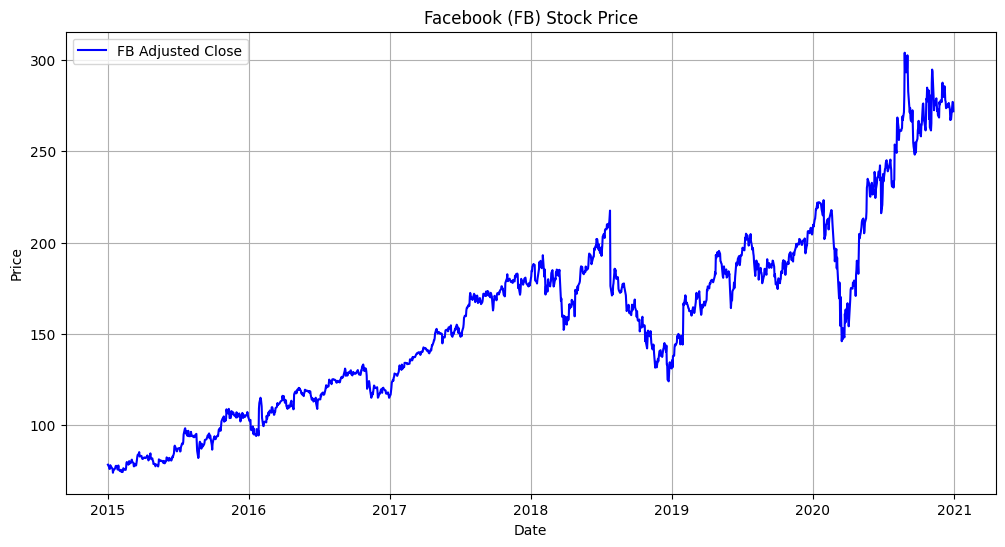

In [10]:
import matplotlib.pyplot as plt

# Assuming you already have the 'FB' DataFrame with historical data
# If not, fetch the data as mentioned in your initial code

# Plotting the Adjusted Closing Price
plt.figure(figsize=(12, 6))
plt.plot(FB.index, FB['Adj Close'], label='FB Adjusted Close', color='blue')
plt.title('Facebook (FB) Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


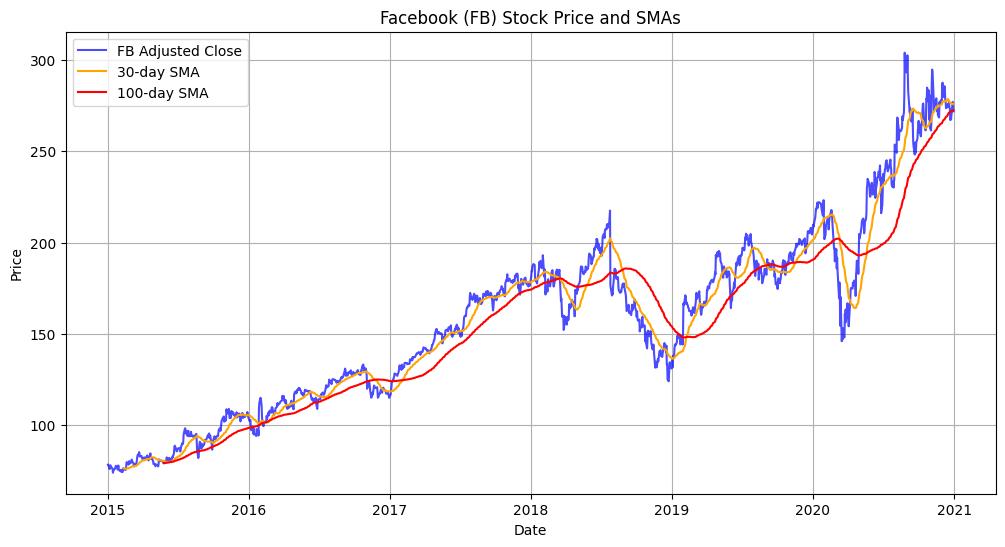

In [11]:
# Calculate 30-day Simple Moving Average (SMA)
FB['30_SMA'] = FB['Adj Close'].rolling(window=30).mean()

# Calculate 100-day Simple Moving Average (SMA)
FB['100_SMA'] = FB['Adj Close'].rolling(window=100).mean()

# Plot the stock price and SMAs
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(FB.index, FB['Adj Close'], label='FB Adjusted Close', color='blue', alpha=0.7)
plt.plot(FB.index, FB['30_SMA'], label='30-day SMA', color='orange')
plt.plot(FB.index, FB['100_SMA'], label='100-day SMA', color='red')

plt.title('Facebook (FB) Stock Price and SMAs')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
#Generating buy and sell signal based on simple moving average cross-over and cross-under
import numpy as np



In [13]:
def signal(data):
  sigPriceBuy=[]
  sigPriceSell=[]
  flag=-1

  for i in range(len(data)):
    if data['30_SMA'][i] > data['100_SMA'][i] and flag != 1:
      sigPriceBuy.append(data['Adj Close'][i])
      sigPriceSell.append(np.nan)
      flag=1
    # else:
    #   sigPriceBuy.append(np.nan)
    #   sigPriceSell.append(np.nan)
    elif data['30_SMA'][i] < data['100_SMA'][i] and flag != 0:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(data['Adj Close'][i])
      flag=0
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)
  return sigPriceBuy, sigPriceSell
#Continuing the code
signal = signal(FB)
FB['Buy_signal_Price']=signal[0]
FB['Sell_signal_price']=signal[1]
FB.tail()


,Open,High,Low,Close,Adj Close,Volume,30_SMA,100_SMA,Buy_signal_Price,Sell_signal_price
Date,,,,,,,,,,
2020-12-23,266.890015,272.170013,266.230011,268.109985,268.109985,14329000,276.342333,271.6891,NaN,NaN
2020-12-24,268.880005,270.399994,266.200012,267.399994,267.399994,6702000,276.039666,271.8648,NaN,NaN
2020-12-28,268.739990,277.299988,265.660004,277.000000,277.000000,23299700,276.103666,272.1436,NaN,NaN
2020-12-29,276.950012,280.510010,276.279999,276.779999,276.779999,16383000,276.097999,272.2586,NaN,NaN
2020-12-30,277.950012,278.079987,271.709991,271.869995,271.869995,11803800,275.861666,272.2929,NaN,NaN


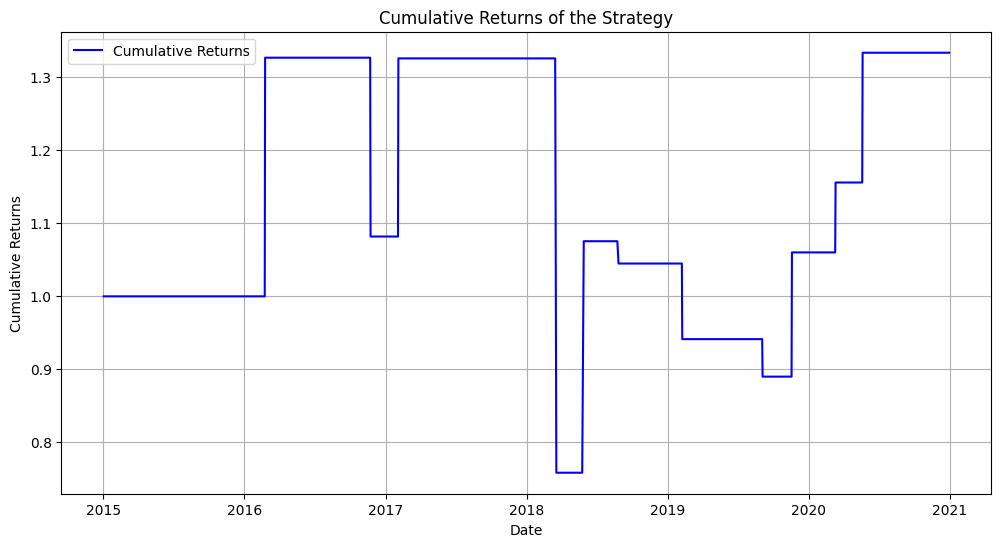

In [14]:
# Calculate daily returns based on buy and sell signals
FB['Buy_Return'] = FB['Buy_signal_Price'].pct_change()
FB['Sell_Return'] = -FB['Sell_signal_price'].pct_change()

# Combine buy and sell returns into a single column
FB['Returns'] = FB['Buy_Return'].fillna(0) + FB['Sell_Return'].fillna(0)

# Calculate cumulative returns
FB['Cumulative_Returns'] = (1 + FB['Returns']).cumprod()

# Plot the cumulative returns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(FB.index, FB['Cumulative_Returns'], label='Cumulative Returns', color='blue')
plt.title('Cumulative Returns of the Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()


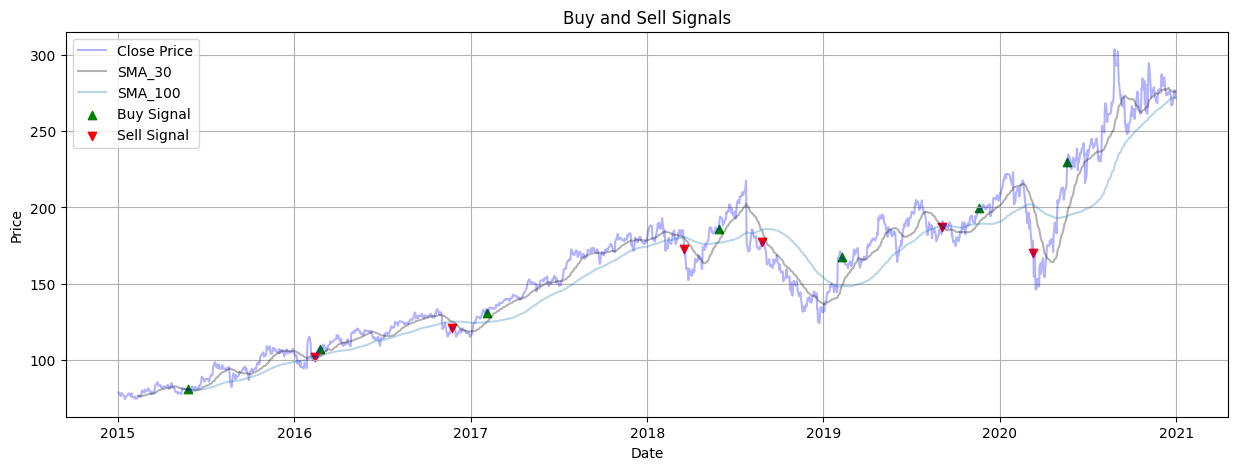

In [15]:
plt.figure(figsize=(15,5))
plt.plot(FB.index, FB['Close'], label='Close Price', color='blue',alpha=0.30)
plt.plot(FB['30_SMA'],label='SMA_30',alpha=0.30,color='black')
plt.plot(FB['100_SMA'],label='SMA_100',alpha=0.30)
plt.scatter(FB.index, FB['Buy_signal_Price'], marker='^', color='green', label='Buy Signal')
plt.scatter(FB.index, FB['Sell_signal_price'], marker='v', color='red', label='Sell Signal')
plt.title('Buy and Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
